Перегляд перших рядків таблиці:
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —

Назви стовпців таблиці:
Index(['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019'],
      dtype='object')

Розмірність таблиці (рядки, стовпці):
(28, 9)

Типи даних у таблиці до перетворення:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Частка пропусків у кожному стовпці:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012 

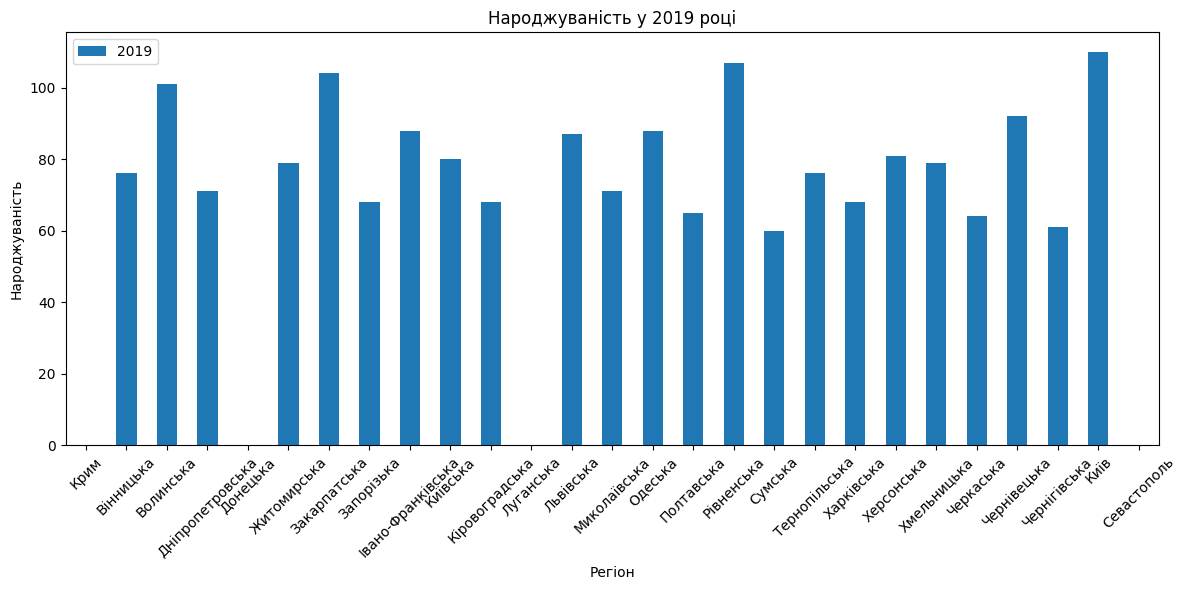

Перегляд перших рядків таблиці:
             Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0              Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2         Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4          Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN


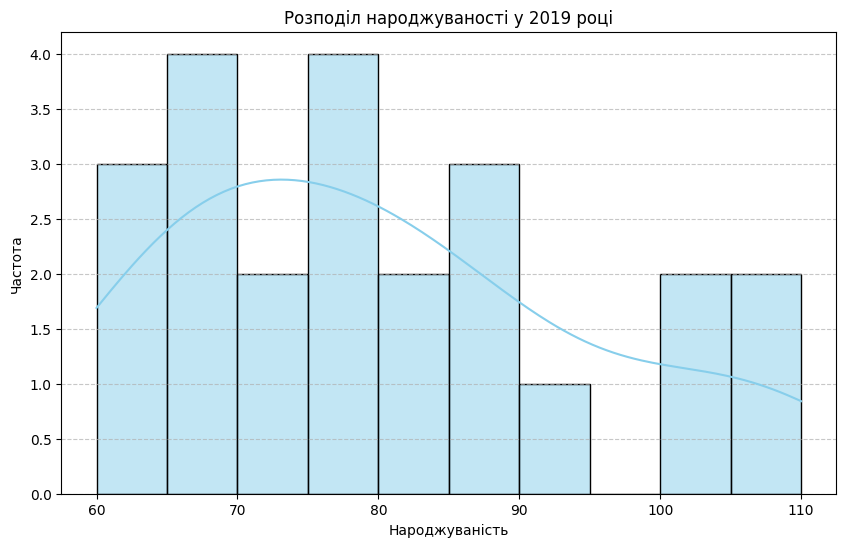

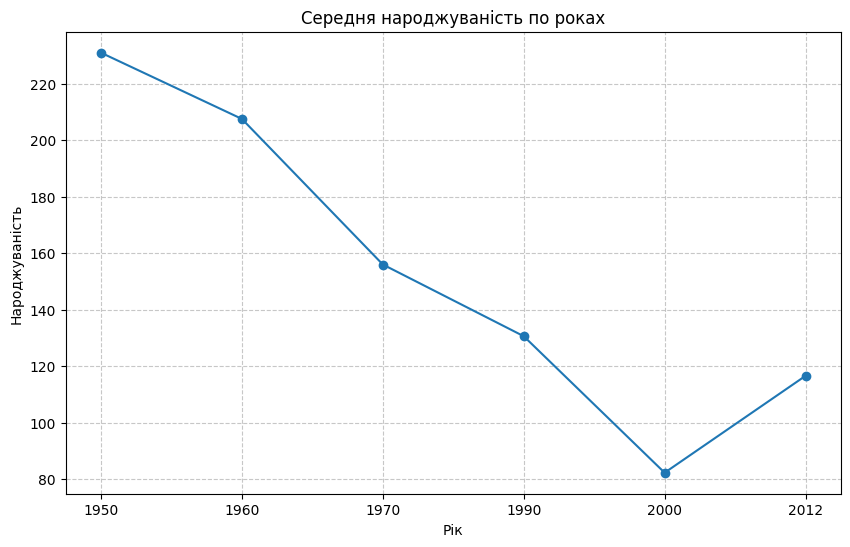

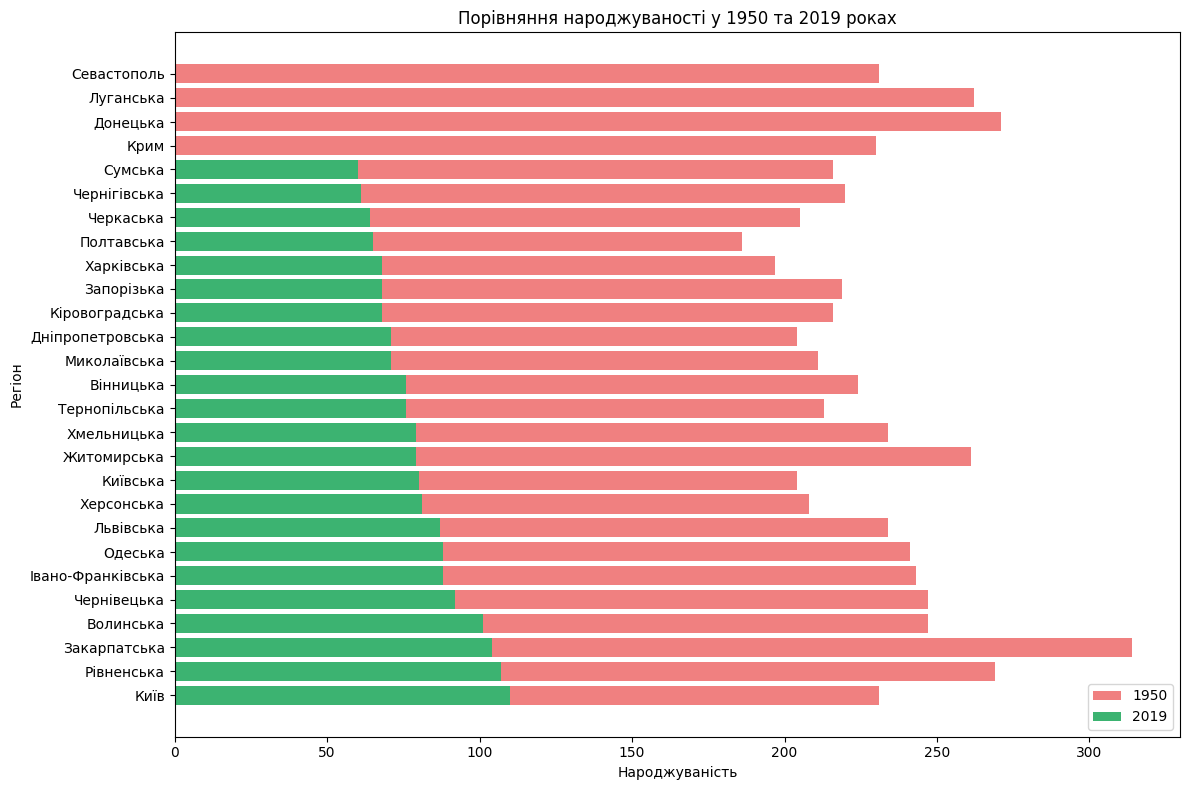

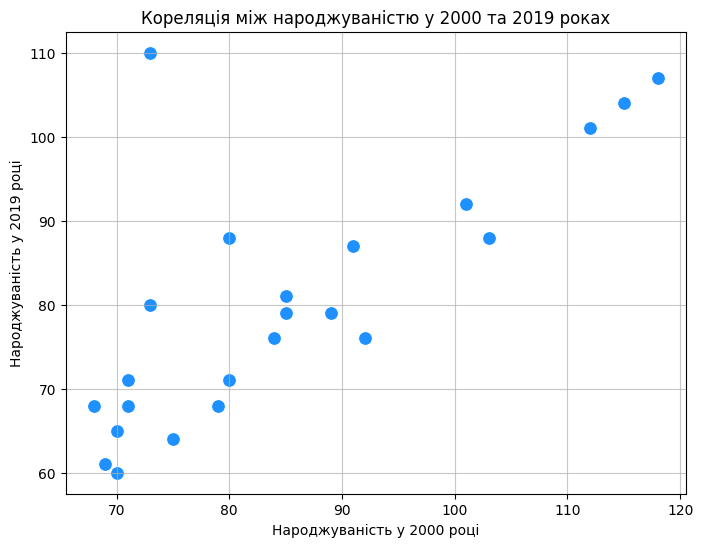

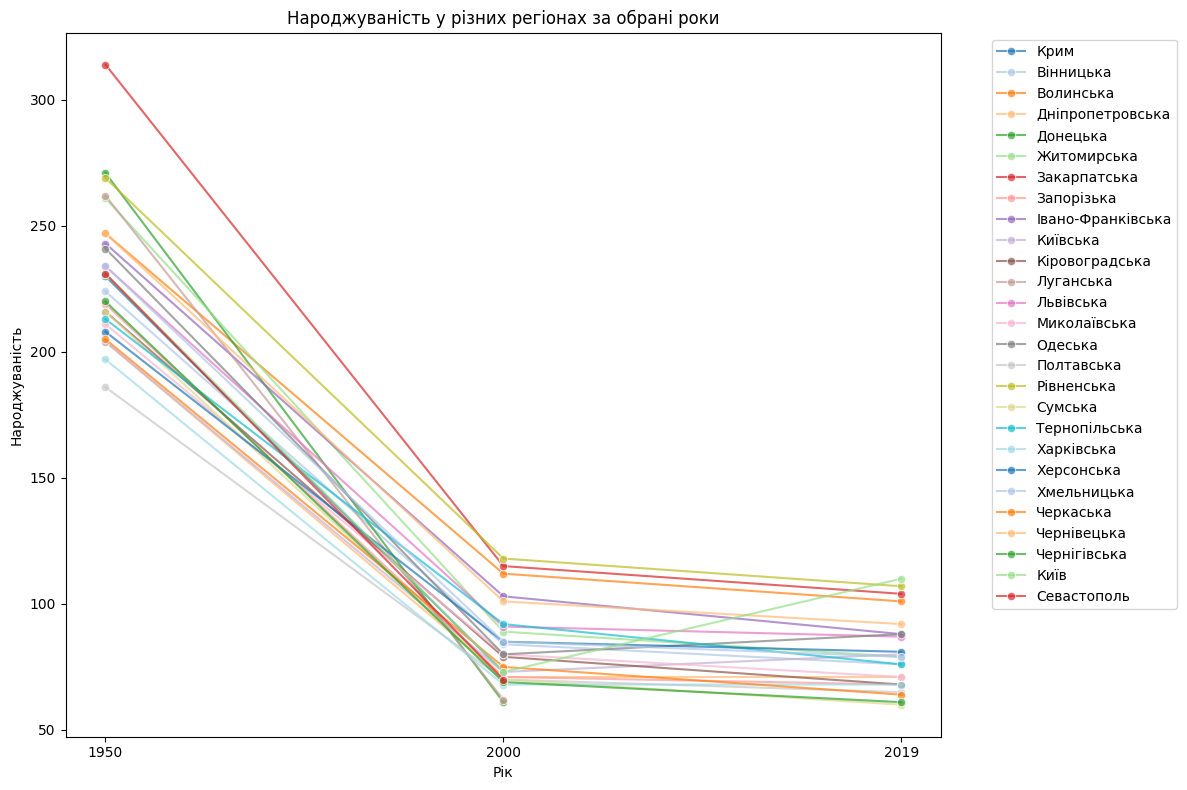

In [2]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote

# Кодування URL для коректної роботи з кирилицею
base_url = "https://uk.wikipedia.org/wiki/"
encoded_url = base_url + quote("Населення_України")

# Читання таблиці з Wikipedia
dataframes = pd.read_html(encoded_url, match="Коефіцієнт народжуваності")
df = dataframes[0]

# Перевірка структури таблиці
print("Перегляд перших рядків таблиці:")
print(df.head())
print("\nНазви стовпців таблиці:")
print(df.columns)

# Визначення кількості рядків і стовпців
print("\nРозмірність таблиці (рядки, стовпці):")
print(df.shape)

# Замінити "—" на NaN
df.replace("—", np.nan, inplace=True)

# Перевірка типів стовпців
print("\nТипи даних у таблиці до перетворення:")
print(df.dtypes)

# Перетворення типів стовпців (окрім першого, який є текстовим)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

# Перевірка частки пропусків
missing_values = df.isnull().sum() / len(df)
print("\nЧастка пропусків у кожному стовпці:")
print(missing_values)

# Видалення рядка з даними по "Вся Україна" та "Україна" і створення копії
df = df[~df["Регіон"].isin(["Вся Україна", "Україна"])].copy()                                                                  # Замінити пропуски на середні значення в числових стовпцях
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Отримуємо числові стовпці
df.loc[:, numeric_columns] = df.loc[:, numeric_columns].fillna(df[numeric_columns].mean())

# Визначення регіонів із народжуваністю вище середньої у 2019 році
avg_2019 = df["2019"].mean()
regions_above_avg_2019 = df[df["2019"] > avg_2019]["Регіон"]
print("\nРегіони з народжуваністю вище середньої у 2019 році:")
print(regions_above_avg_2019)

# Визначення регіону з найвищою народжуваністю у 2014 році
highest_2014 = df[df["2014"] == df["2014"].max()]["Регіон"]
print("\nРегіон із найвищою народжуваністю у 2014 році:")
print(highest_2014)

# Побудова стовпчикової діаграми народжуваності у 2019 році
df.plot(kind="bar", x="Регіон", y="2019", title="Народжуваність у 2019 році", figsize=(12, 6))
plt.xlabel("Регіон")
plt.ylabel("Народжуваність")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                                     


# Директива для побудови графіків у Jupyter Notebook
%matplotlib inline

# Перегляд перших рядків таблиці
print("Перегляд перших рядків таблиці:")
print(df.head())

# Перейменування стовпців
df.columns = df.columns.str.strip()

# Замінити "—" на NaN
df.replace("—", np.nan, inplace=True)

# Перетворення типів стовпців (окрім першого, який є текстовим)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")


# Заповнення пропусків середніми значеннями для числових стовпців
numeric_columns = df.select_dtypes(include=[np.number]).columns
df.loc[:, numeric_columns] = df.loc[:, numeric_columns].fillna(df[numeric_columns].mean())

# Додаткові графіки

# Графік 1: Розподіл народжуваності в 2019 році
plt.figure(figsize=(10, 6))
sns.histplot(df["2019"], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Розподіл народжуваності у 2019 році")
plt.xlabel("Народжуваність")
plt.ylabel("Частота")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Графік 2: Середня народжуваність по роках
average_birth_rate = df.mean(axis=0, numeric_only=True)
average_birth_rate.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Середня народжуваність по роках")
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

# Графік 3: Порівняння народжуваності у 1950 та 2019 роках
df_sorted = df.sort_values(by="2019", ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(df_sorted["Регіон"], df_sorted["1950"], label="1950", color="lightcoral")
plt.barh(df_sorted["Регіон"], df_sorted["2019"], label="2019", color="mediumseagreen")
plt.title("Порівняння народжуваності у 1950 та 2019 роках")
plt.xlabel("Народжуваність")
plt.ylabel("Регіон")
plt.legend()
plt.tight_layout()
plt.show()

# Графік 4: Кореляція між народжуваністю у 2000 та 2019 роках
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="2000", y="2019", color="dodgerblue", s=100)
plt.title("Кореляція між народжуваністю у 2000 та 2019 роках")
plt.xlabel("Народжуваність у 2000 році")
plt.ylabel("Народжуваність у 2019 році")
plt.grid(alpha=0.7)
plt.show()

# Графік 5: Народжуваність у різних регіонах за обрані роки
years_to_plot = ["1950", "2000", "2019"]
df_melted = df.melt(id_vars=["Регіон"], value_vars=years_to_plot, var_name="Рік", value_name="Народжуваність")
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x="Рік", y="Народжуваність", hue="Регіон", marker="o", palette="tab20", alpha=0.7)
plt.title("Народжуваність у різних регіонах за обрані роки")
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()




